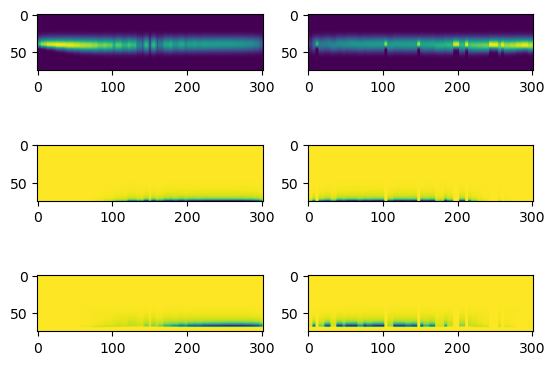

<Figure size 640x480 with 0 Axes>

In [13]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


data_path = Path("../") / "data/data-HH-cc-pcvqz-ccsdt-3"
child = data_path / "1.4500"

data_file = list(child.glob("rho_inv_mrks.npy"))
masks_v_file = list(child.glob("mrks.npy"))
lda_v_file = list(child.glob("lda.npy"))
weight_file = list(child.glob("weight.npy"))
masks_e_file = list(child.glob("mrks_e.npy"))
lda_e_file = list(child.glob("lda_e.npy"))
masks_tr_file = list(child.glob("tr.npy"))

data = np.load(data_file[0])
masks_e = (np.load(masks_e_file[0]) + np.load(masks_tr_file[0])) / (data + 1e-14)

masks_v = np.load(masks_v_file[0]) 
weight = np.load(weight_file[0])

data_imgs = data.copy()
data_weight = weight.copy()
data_e_masks = masks_e.copy()
data_v_masks = masks_v.copy()

data_imgs = data_imgs * data_weight
data_v_masks = data_v_masks
data_e_masks = data_e_masks

f, axes = plt.subplots(3, 2)
axes[0, 0].imshow(data_imgs[0, :, :])
axes[1, 0].imshow(data_v_masks[0, :, :])
axes[2, 0].imshow(data_e_masks[0, :, :])

data_sort_index = np.zeros_like(data_imgs, dtype=int)
data_imgs_sort = np.zeros_like(data_imgs, dtype=float)
data_e_masks_sort = np.zeros_like(data_e_masks, dtype=float)
data_v_masks_sort = np.zeros_like(data_v_masks, dtype=float)

for i in range(data_imgs.shape[0]):
    for j in range(data_imgs.shape[1]):
        data_sort_index[i, j, :] = np.argsort(np.sum(data_imgs[i, :, :], axis=0))
        data_imgs_sort[i, j, :] = data_imgs[i, j, data_sort_index[i, j, :]]
        data_e_masks_sort[i, j, :] = data_e_masks[i, j, data_sort_index[i, j, :]]
        data_v_masks_sort[i, j, :] = data_v_masks[i, j, data_sort_index[i, j, :]]

# data_sort_index = np.argsort(data_imgs.flatten())
# data_imgs_sort = (data_imgs.flatten()[data_sort_index]).reshape(data_imgs.shape)
# data_masks_sort = (data_masks.flatten()[data_sort_index]).reshape(data_masks.shape)

axes[0, 1].imshow(data_imgs_sort[0, :, :])
axes[1, 1].imshow(data_v_masks_sort[0, :, :])
axes[2, 1].imshow(data_e_masks_sort[0, :, :])
plt.show()
plt.clf()

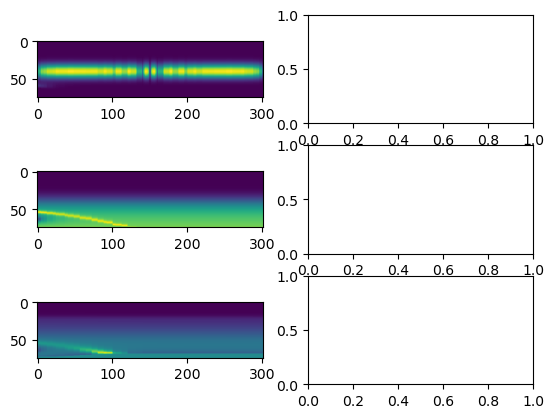

In [10]:
data_path = Path("../") / "mrks-e-HH-H-weit-unetplusplus"
child = data_path / "data"

data_file = list((child / "imgs").glob("data-HH-cc-pcvqz-ccsdt-3-4.4500-0.npy"))
masks_v_file = list((child / "masks").glob("data-HH-cc-pcvqz-ccsdt-3-4.4500-0.npy"))
weight_file = list((child / "weights").glob("data-HH-cc-pcvqz-ccsdt-3-4.4500-0.npy"))

data = np.load(data_file[0])
masks_v = np.load(masks_v_file[0])
weight = np.load(weight_file[0])

data_imgs = data[0, :, :]
data_weight = weight.copy()
data_v_masks = masks_v[0, :, :]
data_e_masks = masks_v[1, :, :]

f, axes = plt.subplots(3, 2)
axes[0, 0].imshow(data_imgs)
axes[1, 0].imshow(data_v_masks)
axes[2, 0].imshow(data_e_masks)

# data_path = Path("../") / "mrks-e-HH-H-unetplusplus-default"
# child = data_path / "data"

# data_file = list((child / "imgs").glob("data-HH-cc-pcvqz-ccsdt-3-0.5000-0.npy"))
# masks_v_file = list((child / "masks").glob("data-HH-cc-pcvqz-ccsdt-3-0.5000-0.npy"))
# weight_file = list((child / "weights").glob("data-HH-cc-pcvqz-ccsdt-3-0.5000-0.npy"))

# data = np.load(data_file[0])
# masks_v = np.load(masks_v_file[0])

# data_imgs = data.copy()
# data_v_masks = masks_v[0, :, :]
# data_e_masks = masks_v[1, :, :]

# axes[0, 1].imshow(data_imgs[0, :, :])
# axes[1, 1].imshow(data_v_masks)
# axes[2, 1].imshow(data_e_masks)

In [9]:
import numpy as np
np.array([-0.2438, 0.9698]) * 1.1
# -0.30475, 1.21225

array([-0.26818,  1.06678])